In [3]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


In [606]:
df = pd.read_csv("/Users/haripriyakumar/Desktop/BAN676/Assignment 1/caravan_masterdata.csv")
df.head()


,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


The master dataset contains TICDATA2000.txt(Training and evaluation) with origin type train, 
TICEVAL2000.txt(test without target variable) and TICTGTS2000.txt(target) all are combined in one file


In [607]:
caravan_dataframe = df.rename({'MOSTYPE':'Customer_Subtype',
                          'MAANTHUI':'Number_of_houses',
                          'MGEMOMV':'Avg_size_household',
                          'MGEMLEEF':'Avg_age',
                          'MOSHOOFD':'Customer_main_type',
                          'MGODRK':'Roman_catholic',
                          'MGODPR':'Protestant',
                           'MGODOV':'Other_religion',
                           'MGODGE':'No_religion',
                           'MRELGE':'Married',
                           'MRELSA':'Living_together',
                           'MRELOV':'Other_relation',
                           'MFALLEEN':'Singles',
                           'MFGEKIND':'Household_without_children',
                           'MFWEKIND':'Household_with_children',
                           'MOPLHOOG':'Highlevel_education',
                           'MOPLMIDD':'Mediumlevel_education',
                           'MOPLLAAG':'Lowerlevel_education',
                           'MBERHOOG':'High_status',
                           'MBERZELF':'Entrepreneur',
                           'MBERBOER':'Farmer',
                           'MBERMIDD':'Middle_management',
                           'MBERARBG':'Skilled_labourers',
                           'MBERARBO':'Unskilled_labourers',
                           'MSKA':'Socialclass_A',
                           'MSKB1':'Socialclass_B1',
                           'MSKB2':'Socialclass_B2',
                           'MSKC':'Socialclass_C',
                           'MSKD':'Socialclass_D',
                           'MHHUUR':'Rented_house',
                           'MHKOOP':'Home_owners',
                           'MAUT1':'1_car',
                           'MAUT2':'2_cars',
                           'MAUT0':'No_car',
                           'MZFONDS':'National_HealthService',
                           'MZPART':'Private_health_insurance',
                           'MINKM30':'Income_30',
                           'MINK3045':'Income30_45',
                           'MINK4575':'Income45_75',
                           'MINK7512':'Income75_122',
                           'MINK123M':'Income_123',
                           'MINKGEM':'Average_income',
                           'MKOOPKLA':'Purchasing_power_class',
                           'PWAPART':'private_thirdparty_insurance',
                          'PWABEDR':'thirdparty_insurance_firms',
                          'PWALAND':'thirdparty_insurance_agriculture',
                          'PPERSAUT':'car_policies',
                          'PBESAUT':'delivery van policies',
                          'PMOTSCO':'motorcycle/scooter_policies',
                          'PVRAAUT':'lorry_policies',
                           'PAANHANG':'trailer_policies',
                           'PTRACTOR':'tractor_policies',
                           'PWERKT':'agricultural_machines_policies',
                           'PBROM':'moped_policies',
                           'PLEVEN':'life_insurances',
                           'PPERSONG':'private_accident_insurance_policies',
                           'PGEZONG':'family_accidents_insurance_policies',
                           'PWAOREG':'disability_insurance_policies',
                           'PBRAND':'fire_policies',
                           'PZEILPL':'surfboard_policies',
                           'PPLEZIER':'boat_policies',
                           'PFIETS':'bicycle_policies',
                           'PINBOED':'property_insurance_policies',
                           'PBYSTAND':'social_security_insurance_policies',
                           'AWAPART':'private_thirdparty_insurance_1_12',
                           'AWABEDR':'Number_thirdparty_insurance_firms',
                           'AWALAND':'Number_thirdparty_insurance_agriculture',
                           'APERSAUT':'Number_car_policies',
                           'ABESAUT':'Number_delivery_van_policies',
                           'AMOTSCO':'Number_motorcycle/scooter_policies',
                           'AVRAAUT':'Number_lorry_policies',
                           'AAANHANG':'Number_trailer_policies',
                           'ATRACTOR':'Number_tractor_policies',
                           'AWERKT':'Number_agricultural_machines_policies',
                           'ABROM':'Number_moped_policies',
                           'ALEVEN':'Number_life_insurances',
                           'APERSONG':'Number_privatAvg_size_householde_accident_insurance_policies',
                           'AGEZONG':'Number_family_accidents_insurance_policies',
                           'AWAOREG':'Number_disability_insurance_policies',
                           'ABRAND':'Number_fire_policies',
                           'AZEILPL':'Number_surfboard_policies',
                           'APLEZIER':'Number_boat_policies',
                           'AFIETS':'Number_bicycle_policies',
                           'AINBOED':'Number_property_insurance_policies',
                           'ABYSTAND':'Number_social_security_insurance_policies',
                           'CARAVAN':'Number_mobilehome_policies_0_1'}, 
                 axis=1)
 

In [464]:
caravan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
ORIGIN                                                          9822 non-null object
Customer_Subtype                                                9822 non-null int64
Number_of_houses                                                9822 non-null int64
Avg_size_household                                              9822 non-null int64
Avg_age                                                         9822 non-null int64
Customer_main_type                                              9822 non-null int64
Roman_catholic                                                  9822 non-null int64
Protestant                                                      9822 non-null int64
Other_religion                                                  9822 non-null int64
No_religion                                                     9822 non-null int64
Married                                             

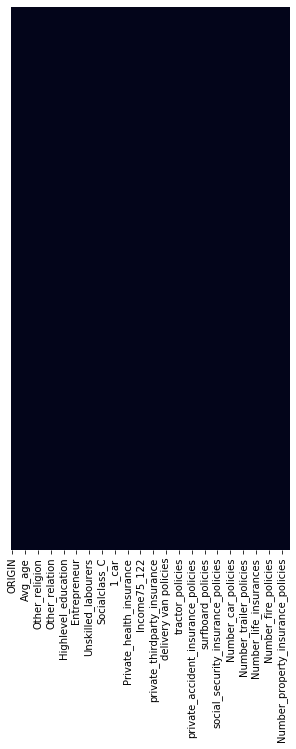

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(caravan_dataframe.isnull(), yticklabels = False, cbar = False)


Empty heat map tells no null value

In [466]:
caravan_dataframe.dtypes


ORIGIN                                       object
Customer_Subtype                              int64
Number_of_houses                              int64
Avg_size_household                            int64
Avg_age                                       int64
                                              ...  
Number_boat_policies                          int64
Number_bicycle_policies                       int64
Number_property_insurance_policies            int64
Number_social_security_insurance_policies     int64
Number_mobilehome_policies_0_1                int64
Length: 87, dtype: object

In [467]:
caravan_dataframe.isnull().sum()


ORIGIN                                       0
Customer_Subtype                             0
Number_of_houses                             0
Avg_size_household                           0
Avg_age                                      0
                                            ..
Number_boat_policies                         0
Number_bicycle_policies                      0
Number_property_insurance_policies           0
Number_social_security_insurance_policies    0
Number_mobilehome_policies_0_1               0
Length: 87, dtype: int64

In [468]:
#Since, Number_of_mobile_home_policies is our dependent variable, let's make sure that it is binary
pd.unique(caravan_dataframe[['Number_mobilehome_policies_0_1']].values.ravel('K'))

array([0, 1])

In [469]:
caravan_dataframe['Number_mobilehome_policies_0_1'].value_counts()

0    9236
1     586
Name: Number_mobilehome_policies_0_1, dtype: int64

In [24]:
#Correlation
corr = caravan_dataframe.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})    .set_caption("Hover to magify")    .set_precision(2)    .set_table_styles(magnify())

Dropping the columns with very high correlation

In [475]:
'''#caravan_dataframe = caravan_dataframe.drop(['Customer_main_type','Household_with_children','Other_relation','Protestant','Mediumlevel_education','Highlevel_education',
                        'No_car','private_thirdparty_insurance','thirdparty_insurance_firms','thirdparty_insurance_agriculture','car_policies','delivery van policies','motorcycle/scooter_policies','lorry_policies',
                         'trailer_policies','tractor_policies','agricultural_machines_policies','moped_policies','life_insurances','private_accident_insurance_policies','family_accidents_insurance_policies','disability_insurance_policies',
                         'fire_policies','surfboard_policies','boat_policies','bicycle_policies','property_insurance_policies','social_security_insurance_policies'],axis=1)

#caravan_dataframe.head()
'''
caravan_dataframe = caravan_dataframe.drop(['Number_delivery_van_policies', 'Number_family_accidents_insurance_policies', 'Number_property_insurance_policies', 'Number_privatAvg_size_householde_accident_insurance_policies', 'Number_boat_policies', 'Number_lorry_policies', 'Number_disability_insurance_policies', 'Number_agricultural_machines_policies', 'Number_surfboard_policies'],axis=1)
caravan_dataframe.head()

#caravan_dataframe = caravan_dataframe.drop(['Number_moped_policies']) 

,ORIGIN,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Roman_catholic,Other_religion,No_religion,Married,Living_together,...,Number_car_policies,Number_motorcycle/scooter_policies,Number_trailer_policies,Number_tractor_policies,Number_moped_policies,Number_life_insurances,Number_fire_policies,Number_bicycle_policies,Number_social_security_insurance_policies,Number_mobilehome_policies_0_1
0,train,33,1,3,2,0,1,3,7,0,...,1,0,0,0,0,0,1,0,0,0
1,train,37,1,2,2,1,1,4,6,2,...,0,0,0,0,0,0,1,0,0,0
2,train,37,1,2,2,0,2,4,3,2,...,1,0,0,0,0,0,1,0,0,0
3,train,9,1,3,3,2,2,4,5,2,...,1,0,0,0,0,0,1,0,0,0
4,train,40,1,4,2,1,1,4,7,1,...,0,0,0,0,0,0,1,0,0,0


In [476]:
df1=caravan_dataframe.drop(['ORIGIN',],axis=1)
df1.head()

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Roman_catholic,Other_religion,No_religion,Married,Living_together,Singles,...,Number_car_policies,Number_motorcycle/scooter_policies,Number_trailer_policies,Number_tractor_policies,Number_moped_policies,Number_life_insurances,Number_fire_policies,Number_bicycle_policies,Number_social_security_insurance_policies,Number_mobilehome_policies_0_1
0,33,1,3,2,0,1,3,7,0,1,...,1,0,0,0,0,0,1,0,0,0
1,37,1,2,2,1,1,4,6,2,0,...,0,0,0,0,0,0,1,0,0,0
2,37,1,2,2,0,2,4,3,2,4,...,1,0,0,0,0,0,1,0,0,0
3,9,1,3,3,2,2,4,5,2,2,...,1,0,0,0,0,0,1,0,0,0
4,40,1,4,2,1,1,4,7,1,2,...,0,0,0,0,0,0,1,0,0,0


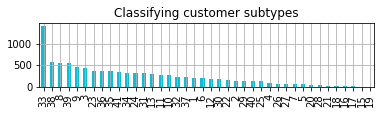

In [137]:
plt.subplot(3,1,2)
df1['Customer_Subtype'].value_counts().plot(kind='bar', 
                                           align='center', title='Classifying customer subtypes', 
                                           color='#10bbd4', grid=True)

Text(0, 0.5, 'Caravan or not')

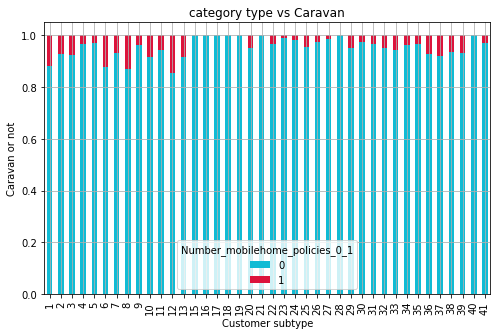

In [138]:
categorysubtype_caravan = pd.crosstab(df['Customer_Subtype'], df['Number_mobilehome_policies_0_1'])
categorysubtype_caravan_pct = categorysubtype_caravan.div(categorysubtype_caravan.sum(1).astype(float), axis=0)
categorysubtype_caravan_pct.plot(figsize= (8,5), kind='bar', stacked=True, color=['#10bbd4', 'crimson'], title='category type vs Caravan', grid=True)
plt.xlabel('Customer subtype')
plt.ylabel('Caravan or not')

#### Senior cosmopolitans, Students in apartments, Fresh masters in the city, Single youth, Suburban youth, Large family farms don't have a single Caravan Policy whereas Middle class families, Affluent young families subtypes have most of the Caravan Policies

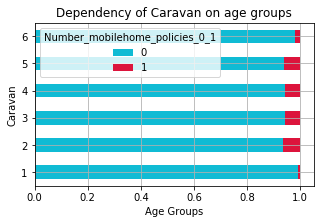

In [139]:
age_caravan = pd.crosstab(df1['Avg_age'], df1['Number_mobilehome_policies_0_1']);
age_caravan_percentage = age_caravan.div(age_caravan.sum(1).astype(float),axis=0);
age_caravan_percentage.plot(figsize=(5,3), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Dependency of Caravan on age groups', grid=True);
plt.xlabel('Age Groups');
plt.ylabel('Caravan');

#### We can verify that age group 1: 20-30yrs don't prefer the caravan policy. thus Age, Subtype are important features for correct classification.

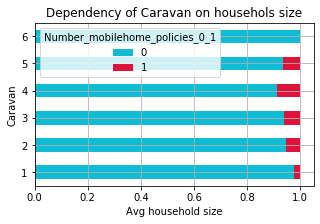

In [140]:
age_caravan = pd.crosstab(df1['Avg_size_household'], df1['Number_mobilehome_policies_0_1']);
age_caravan_percentage = age_caravan.div(age_caravan.sum(1).astype(float),axis=0);
age_caravan_percentage.plot(figsize=(5,3), kind='barh', stacked=True, color=['#10bbd4', 'Crimson'], title='Dependency of Caravan on househols size', grid=True);
plt.xlabel('Avg household size');
plt.ylabel('Caravan');

In [477]:

df_scaled = preprocessing.scale(df1)
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)
df_scaled['Number_mobilehome_policies_0_1'] = df1['Number_mobilehome_policies_0_1']#since we do not want to scale 
                                                                                    #the target column  let's use the original col
df2 = df_scaled
df2.describe().loc[['mean', 'std','max'],].round(2).abs()

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Roman_catholic,Other_religion,No_religion,Married,Living_together,Singles,...,Number_car_policies,Number_motorcycle/scooter_policies,Number_trailer_policies,Number_tractor_policies,Number_moped_policies,Number_life_insurances,Number_fire_policies,Number_bicycle_policies,Number_social_security_insurance_policies,Number_mobilehome_policies_0_1
mean,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.06
std,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,...,1.0,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,0.24
max,1.3,21.58,4.26,3.73,8.18,3.91,3.57,1.48,6.37,4.0,...,18.8,35.6,25.71,23.89,10.95,20.6,11.45,18.98,16.87,1.00


In [478]:
#separate the dataset into X (input features) and y (target variable):
X = df2.loc[:, df2.columns != 'Number_mobilehome_policies_0_1']
y = df2.loc[:, 'Number_mobilehome_policies_0_1']


#### Using Random Forest for further feature selection

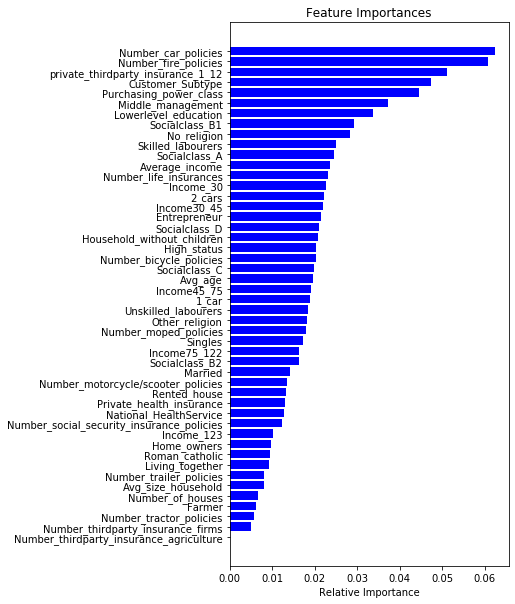

In [480]:
from sklearn.ensemble import RandomForestRegressor
from pylab import rcParams
#rcParams['figure.figsize'] = 5, 10
f = RandomForestRegressor(random_state=1, max_depth=10)
f.fit(X,df2.Number_mobilehome_policies_0_1)
features = df2.columns
importances = f.feature_importances_
indices = np.argsort(importances)[-50:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.figure(figsize=(1,1))
plt.show()



###### Dropping the columns suggested by Random Forest classifier

In [481]:
#df2
df3 = df2.drop(['Roman_catholic','Home_owners',
                'Number_thirdparty_insurance_agriculture',
               'Number_thirdparty_insurance_firms','Number_tractor_policies','Farmer','Number_of_houses','Avg_size_household',
               'Number_trailer_policies','Living_together','Income_123','Number_social_security_insurance_policies','National_HealthService',
               ],axis=1)
df3

,Customer_Subtype,Avg_age,Other_religion,No_religion,Married,Singles,Household_without_children,Lowerlevel_education,High_status,Entrepreneur,...,Average_income,Purchasing_power_class,private_thirdparty_insurance_1_12,Number_car_policies,Number_motorcycle/scooter_policies,Number_moped_policies,Number_life_insurances,Number_fire_policies,Number_bicycle_policies,Number_mobilehome_policies_0_1
0,0.677133,-1.238396,-0.049541,-0.163728,0.427768,-0.498718,-0.768975,1.056252,-0.495393,-0.512586,...,0.146882,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
1,0.986792,-1.238396,-0.049541,0.458857,-0.099666,-1.060785,0.473989,-0.259697,-1.046566,-0.512586,...,0.898274,-0.130244,3.252150,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
2,0.986792,-1.238396,0.939476,0.458857,-1.681967,1.187482,0.473989,-0.259697,-1.046566,-0.512586,...,-0.604511,-0.130244,1.219530,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
3,-1.180826,0.004429,0.939476,0.458857,-0.627099,0.063348,-0.147493,-1.136997,1.158125,-0.512586,...,0.146882,-0.130244,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
4,1.219037,-1.238396,-0.049541,0.458857,0.427768,0.063348,0.473989,-2.014296,-1.046566,5.842654,...,1.649667,-0.630542,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,0.677133,1.247253,0.939476,-2.031485,-0.627099,0.063348,1.716953,0.617602,1.709297,-0.512586,...,-1.355903,-0.630542,1.219530,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
9818,-0.019602,0.004429,-0.049541,-0.163728,-1.154533,1.187482,0.473989,-0.259697,0.055779,-0.512586,...,0.146882,-1.130839,-0.813089,0.727608,-0.179848,-0.265744,2.393733,0.759020,-0.150483,1
9819,0.909378,0.004429,-0.049541,-0.163728,0.427768,0.063348,1.095471,-0.259697,0.055779,-0.512586,...,0.146882,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
9820,0.677133,0.004429,0.939476,-0.163728,0.427768,0.063348,-0.147493,0.178952,-0.495393,0.758462,...,0.146882,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,-1.022791,-0.150483,0


In [482]:
df3 

,Customer_Subtype,Avg_age,Other_religion,No_religion,Married,Singles,Household_without_children,Lowerlevel_education,High_status,Entrepreneur,...,Average_income,Purchasing_power_class,private_thirdparty_insurance_1_12,Number_car_policies,Number_motorcycle/scooter_policies,Number_moped_policies,Number_life_insurances,Number_fire_policies,Number_bicycle_policies,Number_mobilehome_policies_0_1
0,0.677133,-1.238396,-0.049541,-0.163728,0.427768,-0.498718,-0.768975,1.056252,-0.495393,-0.512586,...,0.146882,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
1,0.986792,-1.238396,-0.049541,0.458857,-0.099666,-1.060785,0.473989,-0.259697,-1.046566,-0.512586,...,0.898274,-0.130244,3.252150,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
2,0.986792,-1.238396,0.939476,0.458857,-1.681967,1.187482,0.473989,-0.259697,-1.046566,-0.512586,...,-0.604511,-0.130244,1.219530,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
3,-1.180826,0.004429,0.939476,0.458857,-0.627099,0.063348,-0.147493,-1.136997,1.158125,-0.512586,...,0.146882,-0.130244,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
4,1.219037,-1.238396,-0.049541,0.458857,0.427768,0.063348,0.473989,-2.014296,-1.046566,5.842654,...,1.649667,-0.630542,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,0.677133,1.247253,0.939476,-2.031485,-0.627099,0.063348,1.716953,0.617602,1.709297,-0.512586,...,-1.355903,-0.630542,1.219530,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
9818,-0.019602,0.004429,-0.049541,-0.163728,-1.154533,1.187482,0.473989,-0.259697,0.055779,-0.512586,...,0.146882,-1.130839,-0.813089,0.727608,-0.179848,-0.265744,2.393733,0.759020,-0.150483,1
9819,0.909378,0.004429,-0.049541,-0.163728,0.427768,0.063348,1.095471,-0.259697,0.055779,-0.512586,...,0.146882,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483,0
9820,0.677133,0.004429,0.939476,-0.163728,0.427768,0.063348,-0.147493,0.178952,-0.495393,0.758462,...,0.146882,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,-1.022791,-0.150483,0


In [608]:
df3 = df3.reindex(
    np.random.permutation(df3.index))
#train = len(df2[:5823])
#test = len(df2[5823:])

In [609]:
#separate the dataset into X (input features) and y (target variable):
X = df3.loc[:, df3.columns != 'Number_mobilehome_policies_0_1']
y = df3.loc[:, 'Number_mobilehome_policies_0_1']


Maintaining the same train-test split as given in the data description

In [610]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4072) #Train test split
 

print("shape of X_train:",X_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)



shape of X_train: (5822, 35)
shape of X_test: (4000, 35)
shape of y_train: (5822,)
shape of y_test: (4000,)


In [611]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)#train val split

print("shape of X_train_val:",X_train.shape)
print("shape of X_val:",X_val.shape)
print("shape of y_train_val:",y_train.shape)
print("shape of y_val:",y_val.shape)



shape of X_train_val: (4657, 35)
shape of X_val: (1165, 35)
shape of y_train_val: (4657,)
shape of y_val: (1165,)


In [649]:
X_train.head(10)

,Customer_Subtype,Avg_age,Other_religion,No_religion,Married,Singles,Household_without_children,Lowerlevel_education,High_status,Entrepreneur,...,Income75_122,Average_income,Purchasing_power_class,private_thirdparty_insurance_1_12,Number_car_policies,Number_motorcycle/scooter_policies,Number_moped_policies,Number_life_insurances,Number_fire_policies,Number_bicycle_policies
432,0.212643,1.247253,0.939476,-0.163728,0.427768,0.063348,1.095471,1.494901,-1.046566,-0.512586,...,-0.688833,-1.355903,-1.631136,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
3783,-1.103411,-1.238396,1.928493,-0.786314,-1.154533,-1.060785,-0.768975,0.178952,-1.046566,-0.512586,...,1.015163,0.898274,1.870945,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,-1.022791,-0.150483
321,0.677133,0.004429,-0.049541,-0.786314,-0.099666,-1.060785,-0.147493,-1.136997,0.055779,-0.512586,...,2.719160,1.649667,-0.630542,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
7997,1.141622,-1.238396,-1.038559,-0.786314,1.482635,-1.060785,-0.768975,-0.259697,0.055779,-0.512586,...,1.867162,1.649667,0.370053,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
2689,0.677133,0.004429,-0.049541,-0.163728,0.427768,-0.498718,0.473989,1.056252,-0.495393,-0.512586,...,1.015163,0.146882,-0.630542,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
4219,-1.180826,0.004429,-0.049541,1.704029,-0.099666,0.063348,0.473989,-0.259697,0.055779,0.758462,...,0.163165,-0.604511,0.370053,-0.813089,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
7160,0.677133,-1.238396,0.939476,-2.031485,1.482635,-1.060785,-2.011939,0.178952,0.055779,-0.512586,...,-0.688833,-0.604511,-0.630542,1.219530,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
835,0.677133,0.004429,-1.038559,1.704029,1.482635,0.063348,-0.768975,0.178952,-1.046566,-0.512586,...,-0.688833,-1.355903,-0.630542,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,-1.022791,-0.150483
2511,0.522303,0.004429,1.928493,-0.786314,-0.099666,0.625415,0.473989,1.056252,-0.495393,-0.512586,...,-0.688833,-0.604511,-1.631136,1.219530,-0.915658,-0.179848,-0.265744,-0.207644,0.759020,-0.150483
5156,-1.722731,1.247253,0.939476,-0.786314,0.427768,0.063348,1.095471,1.933551,-1.046566,-0.512586,...,-0.688833,-0.604511,0.870350,-0.813089,0.727608,-0.179848,-0.265744,-0.207644,0.759020,-0.150483


#### Naive model using the dummy classifier - gives you a measure of “baseline” performance

In [490]:
# Create dummy classifer
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)
# Get accuracy score
dummy.score(X_test, y_test)  

0.5105

In [640]:
baseline_model1 = keras.Sequential([
    keras.layers.Dense(100, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(200,activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l=0.1)),
      keras.layers.Dense(1, activation=tf.nn.sigmoid,)

  ])

baseline_model1.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['binary_accuracy'])
baseline_model1.summary()

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100
b_history1 = baseline_model1.fit(X_train,y_train, epochs=EPOCHS,
                    validation_data= (X_val,y_val), verbose=0,
                    callbacks=[PrintDot()])

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 100)               3600      
_________________________________________________________________
dense_221 (Dense)            (None, 200)               20200     
_________________________________________________________________
dense_222 (Dense)            (None, 1)                 201       
Total params: 24,001
Trainable params: 24,001
Non-trainable params: 0
_________________________________________________________________

....................................................................................................

In [641]:
print(max(b_history1.history['val_binary_accuracy']))

0.949356198310852


In [642]:
scores = baseline_model1.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = baseline_model1.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


146/146 [==============================] - 0s 513us/step - loss: 0.1592 - binary_accuracy: 0.9482
Training Accuracy: 94.82%

125/125 [==============================] - 0s 850us/step - loss: 0.3093 - binary_accuracy: 0.9293
Testing Accuracy: 92.93%



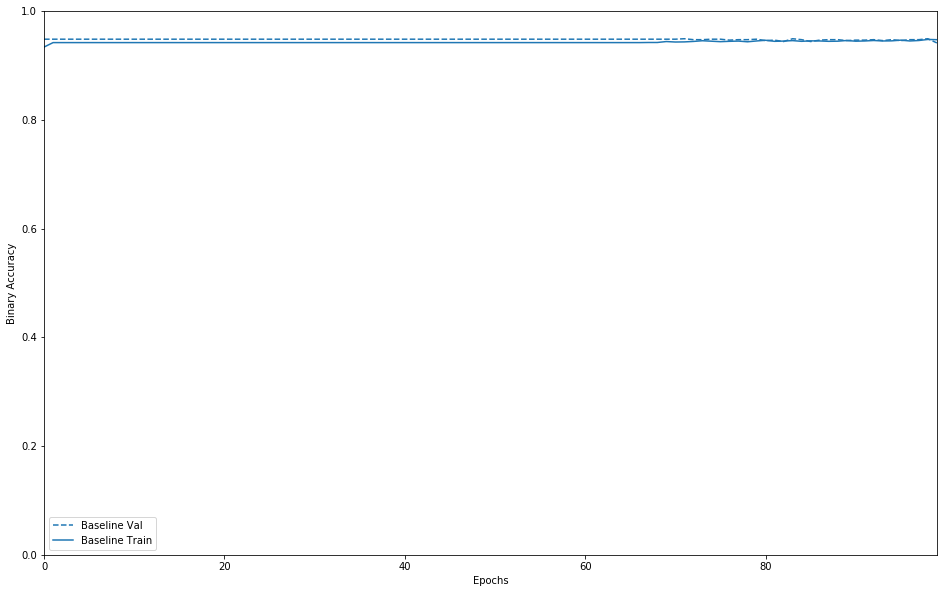

In [643]:
import matplotlib.pyplot as plt


def plot_history(histories, key='binary_accuracy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,1])

plot_history([('baseline', b_history1)])
  

In [644]:
b_history1.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [628]:
predictions = baseline_model1.predict_classes(X_test)
predictions


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [647]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[3666,   77],
       [ 236,   21]])

#### The dimension of this matrix is 2*2 because this model is a binary classification. We have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 3666 and 21 are actual predictions and 236 and 77 are incorrect predictions.

In [648]:
valpreds = baseline_model1.predict_on_batch(X_val)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(y_val)

2488    0
6228    0
3221    0
7692    0
5150    0
6183    0
810     0
3657    0
8124    0
420     0
3573    0
5523    1
6050    0
2692    0
9792    0
923     0
2131    0
1947    0
9221    0
6750    0
5758    0
827     0
860     0
6278    0
5136    1
6717    0
1103    0
4703    0
2352    0
7670    0
164     0
6040    0
6420    0
8752    0
8994    0
1806    0
5420    0
2706    0
5513    0
2702    0
8888    0
7870    0
9554    0
6601    0
4675    0
6468    0
4793    0
7891    0
396     0
2842    0
4391    0
1751    0
3631    0
5133    0
2841    0
5862    0
1709    0
4537    0
6767    0
7441    0
3648    0
1735    0
1016    0
332     0
4003    0
8047    0
780     0
1023    0
1655    0
7077    0
7900    0
4746    0
2770    0
7062    0
5379    0
6981    0
4847    0
6380    0
3481    0
3914    0
8827    0
5085    0
5478    0
2304    0
6093    0
4503    0
3988    0
1047    0
9025    0
5620    0
3905    0
4683    0
6274    0
5991    0
989     0
9770    0
179     1
8875    0
3889    0
7694    0


### ANALYSIS:

Model 1 - Navie Model Which gives us an accuracy of 51.5%
Model 2 - which is a NN model with 2 hidden layers and 1 output layer with a sigmoid activation function. It gives an acuuracy of 95.02%

From the graph we can see that the generalization gap is very small and with the accuracy being 95.02%

We can conclude that the NN model is performing better and shows no overfitting.